In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import os
import numpy
import requests as rq
import pandas as pd
from io import BytesIO
import json
from scipy import stats

In [3]:
csv_path = os.path.join('clean_data','labor_force_participation.csv')
with open(csv_path) as csvfile:
    labor_force_df = pd.read_csv(csv_path, header=[0])
    labor_force_df = pd.DataFrame(labor_force_df)
    labor_force_df = labor_force_df.set_index('Country Name')

In [4]:
labor_force_df

,Labor Force Participation Female - 2018,Labor Force Participation Male - 2018
Country Name,,
Brazil,60.90,79.97
Argentina,59.02,79.70
Colombia,62.55,85.12
United States,67.23,78.00
United Kingdom,73.08,82.40
United Arab Emirates,53.16,93.95
Turkey,38.15,78.39
Norway,75.27,80.13
Greece,60.17,76.56


In [5]:
#find Differential between sexes and map to df
labor_force_df['Percent_Delta'] = labor_force_df['Labor Force Participation Male - 2018'] - labor_force_df['Labor Force Participation Female - 2018']
labor_force_df = labor_force_df.sort_values("Percent_Delta", ascending=False)
labor_force_df

,Labor Force Participation Female - 2018,Labor Force Participation Male - 2018,Percent_Delta
Country Name,,,
India,22.16,79.70,57.54
"Egypt, Arab Rep.",20.02,75.25,55.23
United Arab Emirates,53.16,93.95,40.79
Turkey,38.15,78.39,40.24
Colombia,62.55,85.12,22.57
Argentina,59.02,79.70,20.68
Brazil,60.90,79.97,19.07
Greece,60.17,76.56,16.39
Singapore,69.39,83.70,14.31


In [6]:
# Filter the DataFrame down only to those columns to chart
labor_delta = labor_force_df[["Percent_Delta"]]
labor_delta.head()

,Percent_Delta
Country Name,
India,57.54
"Egypt, Arab Rep.",55.23
United Arab Emirates,40.79
Turkey,40.24
Colombia,22.57


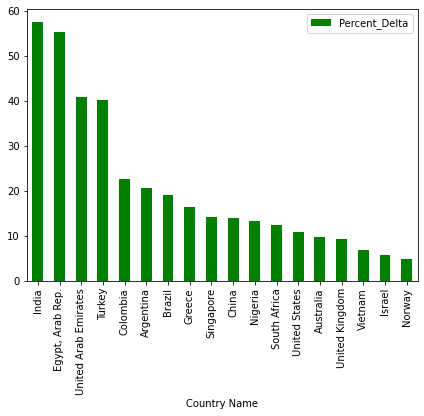

<Figure size 432x288 with 0 Axes>

In [7]:
# Use DataFrame.plot() in order to create a bar chart of the data
labor_delta.plot(kind="bar", figsize=(7,5), color = 'green')

plt.show()
plt.tight_layout()

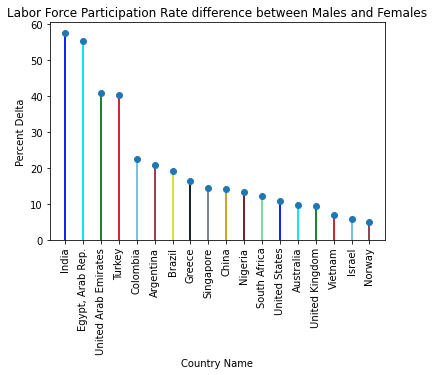

In [8]:

# using subplots() to draw vertical lines
fig, axes = plt.subplots()
axes.vlines(labor_force_df.index, ymin=0, ymax=labor_force_df['Percent_Delta'])
  
# drawing the markers (circle)
axes.plot(labor_force_df.index, labor_force_df['Percent_Delta'], "o")
axes.set_ylim(0)


line_colors = ['blue', 'cyan', 'green', 'red',
               'skyblue', 'brown', 'yellow',
               'black', 'grey', 'orange', 'maroon',
               'lightgreen']
  
axes.vlines(labor_force_df.index, ymin=0,
            ymax=labor_force_df['Percent_Delta'], colors=line_colors)


# formatting and details
plt.xlabel('Country Name')
plt.ylabel('Percent Delta')
plt.title('Labor Force Participation Rate difference between Males and Females')
plt.xticks(labor_force_df.index)
plt.xticks(rotation=90)
plt.show()

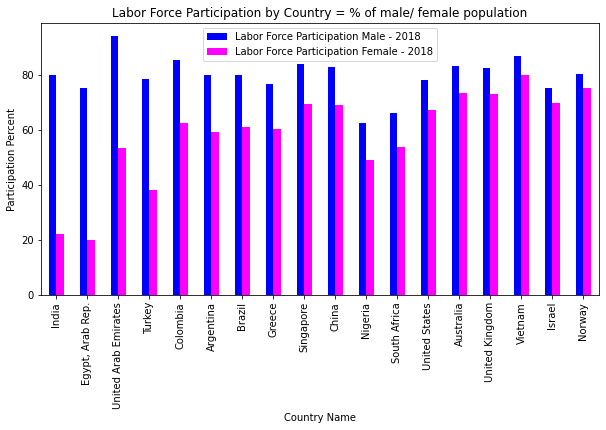

<Figure size 432x288 with 0 Axes>

In [9]:
labor_force_mf = labor_force_df[["Labor Force Participation Male - 2018", "Labor Force Participation Female - 2018"]]
labor_force_mf.head()

labor_force_mf.plot(kind="bar", figsize=(10,5),color=['blue', 'magenta'])

# Set a title for the chart
plt.title("Labor Force Participation by Country = % of male/ female population")
plt.xlabel('Country Name')
plt.ylabel('Participation Percent')
plt.show()
plt.tight_layout()

# World Bank Definition of Sectors:

"High-level grouping of economic activities based on the on the types of goods and services produced." https://thedocs.worldbank.org/en/doc/538321490128452070-0290022017/original/NewSectorTaxonomyanddefinitions.pdf



In [10]:
csv_path = os.path.join('clean_data','employment_by_sector.csv')
with open(csv_path) as csvfile:
    emp_sector_df = pd.read_csv(csv_path, header=[0])
    emp_sector_df = pd.DataFrame(emp_sector_df)
    emp_sector_df = emp_sector_df.set_index('Country Name')

In [11]:
emp_sector_df

,Agricultural Employment Female - 2018,Agricultural Employment Male - 2018,Industry Employment Female - 2018,Industry Employment Male - 2018,Service Employment Female - 2018,Service Employment Male - 2018
Country Name,,,,,,
Brazil,4.140000,13.060000,10.750000,27.090000,85.110001,59.840000
Argentina,0.060000,0.120000,9.140000,31.309999,90.809998,68.570000
Colombia,7.810000,23.070000,14.860000,23.660000,77.330002,53.279999
United States,0.760000,1.890000,8.780000,29.360001,90.470001,68.750000
United Kingdom,0.620000,1.470000,7.450000,27.530001,91.930000,71.000000
United Arab Emirates,0.010000,1.760000,5.530000,40.450001,94.459999,57.790001
Turkey,26.030001,14.860000,16.070000,31.639999,57.900002,53.500000
Norway,1.090000,3.010000,7.000000,30.570000,91.910004,66.419998
Greece,11.730000,12.640000,7.730000,20.480000,80.550003,66.879997


In [12]:
ag_sector_df = emp_sector_df.loc[:, ("Agricultural Employment Female - 2018", "Agricultural Employment Male - 2018")]
ag_sector_df['Percent_Delta'] = ag_sector_df['Agricultural Employment Male - 2018']- ag_sector_df['Agricultural Employment Female - 2018']
ag_sector_df = ag_sector_df.sort_values("Percent_Delta", ascending=False)
ag_sector_df

,Agricultural Employment Female - 2018,Agricultural Employment Male - 2018,Percent_Delta
Country Name,,,
Nigeria,24.240000,44.799999,20.559999
Colombia,7.810000,23.070000,15.260000
Brazil,4.140000,13.060000,8.920001
China,22.780001,28.660000,5.879999
South Africa,3.880000,6.170000,2.290000
Norway,1.090000,3.010000,1.920000
Australia,1.680000,3.440000,1.760000
United Arab Emirates,0.010000,1.760000,1.750000
United States,0.760000,1.890000,1.130000


In [13]:
# Filter the DataFrame down only to those columns to chart
ag_delta = ag_sector_df[["Percent_Delta"]]
ag_delta.head()

,Percent_Delta
Country Name,
Nigeria,20.559999
Colombia,15.260000
Brazil,8.920001
China,5.879999
South Africa,2.290000


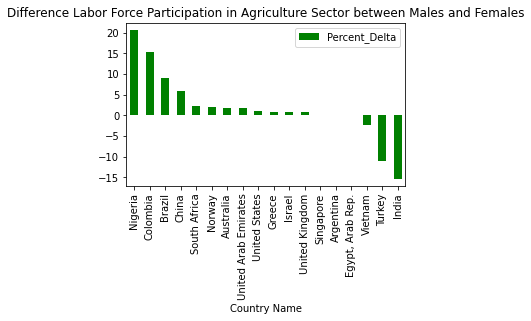

<Figure size 432x288 with 0 Axes>

In [14]:
# Use DataFrame.plot() in order to create a bar chart of the data
ag_delta.plot(kind="bar", figsize=(5,3), color = 'green')

# Set a title for the chart
plt.title("Difference Labor Force Participation in Agriculture Sector between Males and Females")

plt.show()
plt.tight_layout()

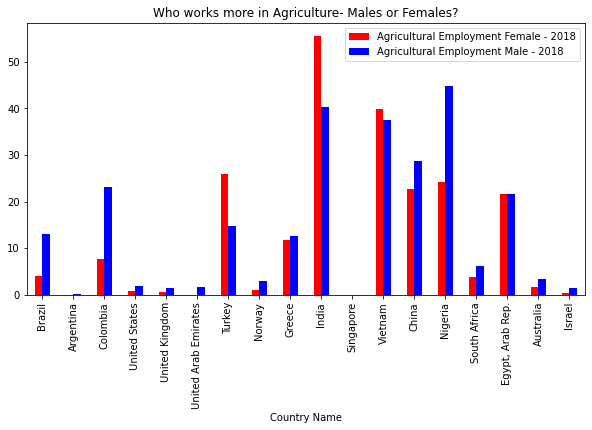

<Figure size 432x288 with 0 Axes>

In [15]:
ag_sector_mf = emp_sector_df[["Agricultural Employment Female - 2018", "Agricultural Employment Male - 2018"]]

ag_sector_mf.plot(kind="bar", figsize=(10,5),color=['red', 'blue'])

# Set a title for the chart
plt.title("Who works more in Agriculture- Males or Females?")

plt.show()
plt.tight_layout()

In [16]:
service_sector_df = emp_sector_df.loc[:, ("Service Employment Female - 2018", "Service Employment Male - 2018")]
service_sector_df['Percent_Delta'] = service_sector_df['Service Employment Male - 2018']- service_sector_df['Service Employment Female - 2018']
service_sector_df = service_sector_df.sort_values("Percent_Delta", ascending=False)
service_sector_df

,Service Employment Female - 2018,Service Employment Male - 2018,Percent_Delta
Country Name,,,
India,27.190001,32.869999,5.679998
Turkey,57.900002,53.500000,-4.400002
Vietnam,37.540001,32.020000,-5.520000
Singapore,88.660004,80.580002,-8.080002
China,53.040001,39.759998,-13.280003
Greece,80.550003,66.879997,-13.670006
Israel,91.440002,73.000000,-18.440002
Nigeria,62.950001,43.840000,-19.110001
United Kingdom,91.930000,71.000000,-20.930000


In [17]:
# Filter the DataFrame down only to those columns to chart
service_delta = service_sector_df[["Percent_Delta"]]
service_delta.head()

,Percent_Delta
Country Name,
India,5.679998
Turkey,-4.400002
Vietnam,-5.520000
Singapore,-8.080002
China,-13.280003


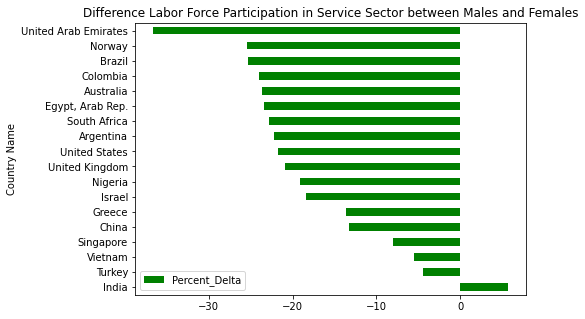

<Figure size 432x288 with 0 Axes>

In [18]:
# Use DataFrame.plot() in order to create a bar chart of the data
#data['values'].plot(kind='barh',
                   # color=(data['values'] > 0).map({True: 'g',
                                                  #  False: 'r'}))
        
#service_delta['Percent_Delta'].plot(kind='barh', color=(service_delta['Percent_Delta']> 0).map({True:'b', False:'r'}))

service_delta.plot(kind="barh", figsize=(7,5), color = 'green')

# Set a title for the chart
plt.title("Difference Labor Force Participation in Service Sector between Males and Females")

plt.show()
plt.tight_layout()


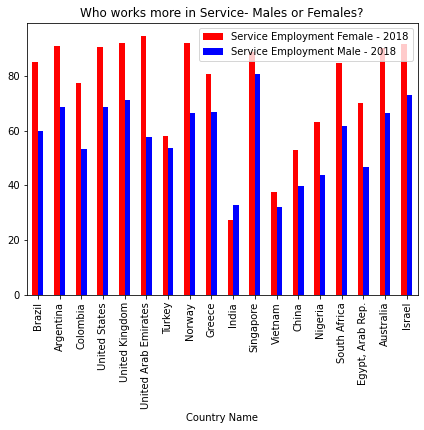

<Figure size 432x288 with 0 Axes>

In [19]:
service_sector_mf = emp_sector_df[["Service Employment Female - 2018", "Service Employment Male - 2018"]]

service_sector_mf.plot(kind="bar", figsize=(7,5),color=['red', 'blue'])

# Set a title for the chart
plt.title("Who works more in Service- Males or Females?")

plt.show()
plt.tight_layout()

In [20]:
industry_sector_df = emp_sector_df.loc[:, ("Industry Employment Female - 2018", "Industry Employment Male - 2018")]
industry_sector_df['Percent_Delta'] = industry_sector_df['Industry Employment Male - 2018']- industry_sector_df['Industry Employment Female - 2018']
industry_sector_df = industry_sector_df.sort_values("Percent_Delta", ascending=False)
industry_sector_df

,Industry Employment Female - 2018,Industry Employment Male - 2018,Percent_Delta
Country Name,,,
United Arab Emirates,5.530000,40.450001,34.920001
Norway,7.000000,30.570000,23.570000
"Egypt, Arab Rep.",8.250000,31.730000,23.480000
Argentina,9.140000,31.309999,22.169999
Australia,8.150000,30.090000,21.940001
United States,8.780000,29.360001,20.580001
South Africa,11.620000,32.160000,20.540000
United Kingdom,7.450000,27.530001,20.080001
Israel,8.080000,25.610001,17.530001


In [21]:
# Filter the DataFrame down only to those columns to chart
industry_delta = industry_sector_df[["Percent_Delta"]]
industry_delta.head()

,Percent_Delta
Country Name,
United Arab Emirates,34.920001
Norway,23.570000
"Egypt, Arab Rep.",23.480000
Argentina,22.169999
Australia,21.940001


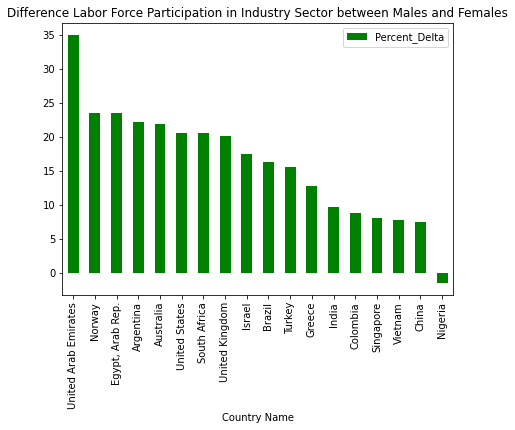

<Figure size 432x288 with 0 Axes>

In [22]:
# Use DataFrame.plot() in order to create a bar chart of the data
industry_delta.plot(kind="bar", figsize=(7,5), color = 'green')

#def bar_color(industry_delta,color1,color2):
   # return np.where(industry_delta.values>0,color1,color2)

#industry_delta.plot.barh(color=bar_color(industry_delta,'red','blue'))

#def bar_color(df,color1,color2):
 #   return np.where(df.values>0,color1,color2)
# Set a title for the chart
plt.title("Difference Labor Force Participation in Industry Sector between Males and Females")

plt.show()
plt.tight_layout()

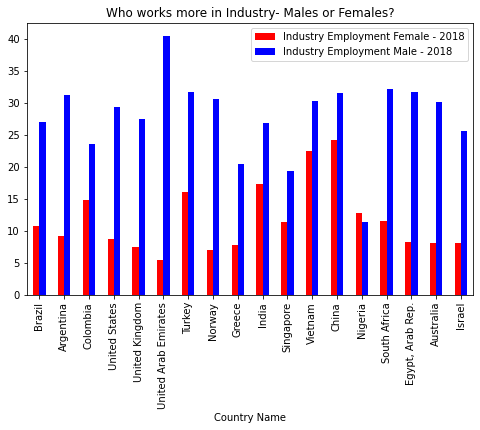

<Figure size 432x288 with 0 Axes>

In [23]:
industry_sector_mf = emp_sector_df[["Industry Employment Female - 2018", "Industry Employment Male - 2018"]]

industry_sector_mf.plot(kind="bar", figsize=(8,5),color=['red', 'blue'])

# Set a title for the chart
plt.title("Who works more in Industry- Males or Females?")

plt.show()
plt.tight_layout()

In [24]:
csv_path = os.path.join('raw_data/WDI_Trimmed_Dataset_20220130.csv')
with open(csv_path) as csvfile:
    trimmed_df = pd.read_csv(csv_path, header=[0])
    trimmed_df = pd.DataFrame(trimmed_df)

In [25]:
# Isolate female labor force participation
labor_f_df = trimmed_df.loc[trimmed_df['Series Code'] == 'SL.TLF.ACTI.FE.ZS']
labor_f_df = labor_f_df.set_index('Country Name')
labor_f_df = labor_f_df.drop(['Country Code',
                                      'Series Code',
                                      'Series Name',
                                      '2014 [YR2014]',
                                      '2015 [YR2015]',
                                      '2016 [YR2016]',
                                      '2017 [YR2017]',
                                      '2019 [YR2019]',
                                      '2020 [YR2020]',
                                      '2010-2020'],
                                     axis = 1)
labor_f_df = labor_f_df.rename(columns={"2018 [YR2018]": "Labor Force Participation Female - 2018"})
labor_f_df = labor_f_df.drop(index='Country List')

# Isolate male labor force participation
labor_m_df = trimmed_df.loc[trimmed_df['Series Code'] == 'SL.TLF.ACTI.MA.ZS']
labor_m_df = labor_m_df.set_index('Country Name')
labor_m_df = labor_m_df.drop(['Country Code',
                                      'Series Code',
                                      'Series Name',
                                      '2014 [YR2014]',
                                      '2015 [YR2015]',
                                      '2016 [YR2016]',
                                      '2017 [YR2017]',
                                      '2019 [YR2019]',
                                      '2020 [YR2020]',
                                      '2010-2020'],
                                     axis = 1)
labor_m_df = labor_m_df.rename(columns={"2018 [YR2018]": "Labor Force Participation Male - 2018"})
labor_m_df = labor_m_df.drop(index='Country List')

labor_force_participation_2018_df = labor_f_df.merge(labor_m_df, on='Country Name')
print('Labor force participation rate for ages 15-64, female (%)')

labor_force_participation_2018_df.to_csv("clean_data/labor_force_participation_2018_test.csv", index=True, header=True)

labor_force_participation_2018_df

Labor force participation rate for ages 15-64, female (%)


,Labor Force Participation Female - 2018,Labor Force Participation Male - 2018
Country Name,,
Brazil,60.9,79.97
Argentina,59.02,79.7
Colombia,62.55,85.12
United States,67.23,78
United Kingdom,73.08,82.4
United Arab Emirates,53.16,93.95
Turkey,38.15,78.39
Norway,75.27,80.13
Greece,60.17,76.56


In [26]:
csv_path = os.path.join('clean_data','labor_force_participation_2018_test.csv')
with open(csv_path) as csvfile:
    labor_force_2018_df = pd.read_csv(csv_path, header=[0])
    labor_force_2018_df = pd.DataFrame(labor_force_2018_df)
    labor_force_2018_df = labor_force_2018_df.set_index('Country Name')

In [27]:
#find Differential between sexes and map to df
labor_force_2018_df['Percent_Delta'] = labor_force_2018_df['Labor Force Participation Male - 2018'] - labor_force_2018_df['Labor Force Participation Female - 2018']
labor_force_2018_df = labor_force_2018_df.sort_values("Percent_Delta", ascending=False)
labor_force_2018_df

,Labor Force Participation Female - 2018,Labor Force Participation Male - 2018,Percent_Delta
Country Name,,,
India,22.16,79.70,57.54
"Egypt, Arab Rep.",20.02,75.25,55.23
United Arab Emirates,53.16,93.95,40.79
Turkey,38.15,78.39,40.24
Colombia,62.55,85.12,22.57
Argentina,59.02,79.70,20.68
Brazil,60.90,79.97,19.07
Greece,60.17,76.56,16.39
Singapore,69.39,83.70,14.31


In [28]:
labor_delta_2018= labor_force_2018_df[["Percent_Delta"]]
labor_delta_2018.head()

,Percent_Delta
Country Name,
India,57.54
"Egypt, Arab Rep.",55.23
United Arab Emirates,40.79
Turkey,40.24
Colombia,22.57


The r^2 value is 0.079 and the pvalue 0.26.


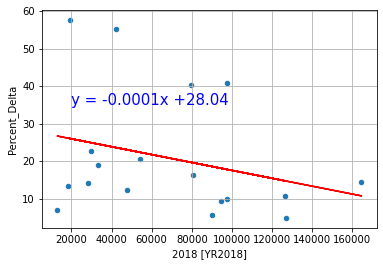

In [43]:
gdp_csv = 'clean_data/gdp_df.csv'
gdp_df = pd.read_csv(gdp_csv)
labor_delta_2018
gdp_v_labor_delta_2018 = pd.merge(gdp_df, labor_delta_2018, on='Country Name')
gdp_v_labor_delta_2018
gdp_v_labor_delta_2018.plot('2018 [YR2018]', 'Percent_Delta', kind='scatter')
x_values = gdp_v_labor_delta_2018['2018 [YR2018]']
y_values = gdp_v_labor_delta_2018['Percent_Delta']
# Perform a linear regression 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,4)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20000,35),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.grid()
print(f"The r^2 value is {round(rvalue**2, 3)} and the pvalue {round(pvalue, 2)}.")



array([[<AxesSubplot:title={'center':'Percent_Delta'}>]], dtype=object)

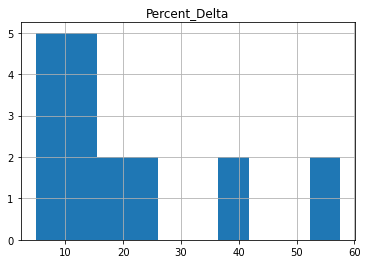

In [30]:
gdp_v_labor_delta_2018.hist(column = 'Percent_Delta')



array([[<AxesSubplot:title={'center':'2018 [YR2018]'}>]], dtype=object)

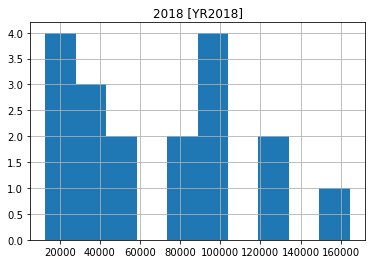

In [31]:
gdp_v_labor_delta_2018.hist(column = '2018 [YR2018]')

<AxesSubplot:>

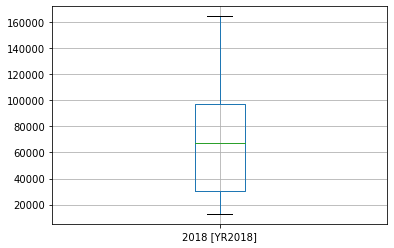

In [32]:
gdp_v_labor_delta_2018.boxplot(column = '2018 [YR2018]')

<AxesSubplot:>

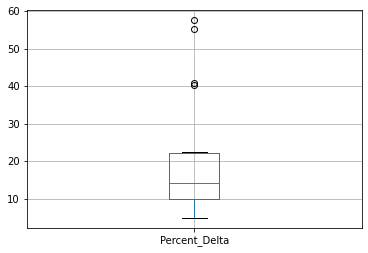

In [33]:
gdp_v_labor_delta_2018.boxplot(column = 'Percent_Delta')

In [34]:
gdp_df

,Country Name,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2010-2020
0,Brazil,34236.71,33107.94,32876.20,33212.97,33207.95,32929.21,34683.65,0.46
1,Argentina,56999.67,57713.17,55759.61,56603.88,54249.57,52679.84,52706.35,-0.79
2,Colombia,29073.65,29155.80,29448.86,29407.35,29813.44,30874.89,32627.71,2.01
3,United States,121656.12,123398.85,123455.29,124337.14,126498.02,127582.92,130835.67,0.99
4,United Kingdom,91699.07,92502.88,93210.80,94133.24,94479.77,94956.26,86043.81,-0.40
5,United Arab Emirates,89203.53,93217.17,95720.18,97884.12,97683.54,99862.26,96628.59,2.23
6,Turkey,74323.01,76263.49,76610.51,79444.60,79690.92,81783.40,86076.46,2.92
7,Norway,121974.05,123637.32,125115.19,127641.83,126887.48,126466.21,126410.51,0.58
8,Greece,86123.99,84378.14,82536.49,81418.47,80668.85,79859.05,73326.64,-1.49
9,India,14837.09,15882.34,17043.07,18059.02,19099.06,19574.93,19419.10,4.84
